# Synthetic Dataset Creation

## Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create Dataset

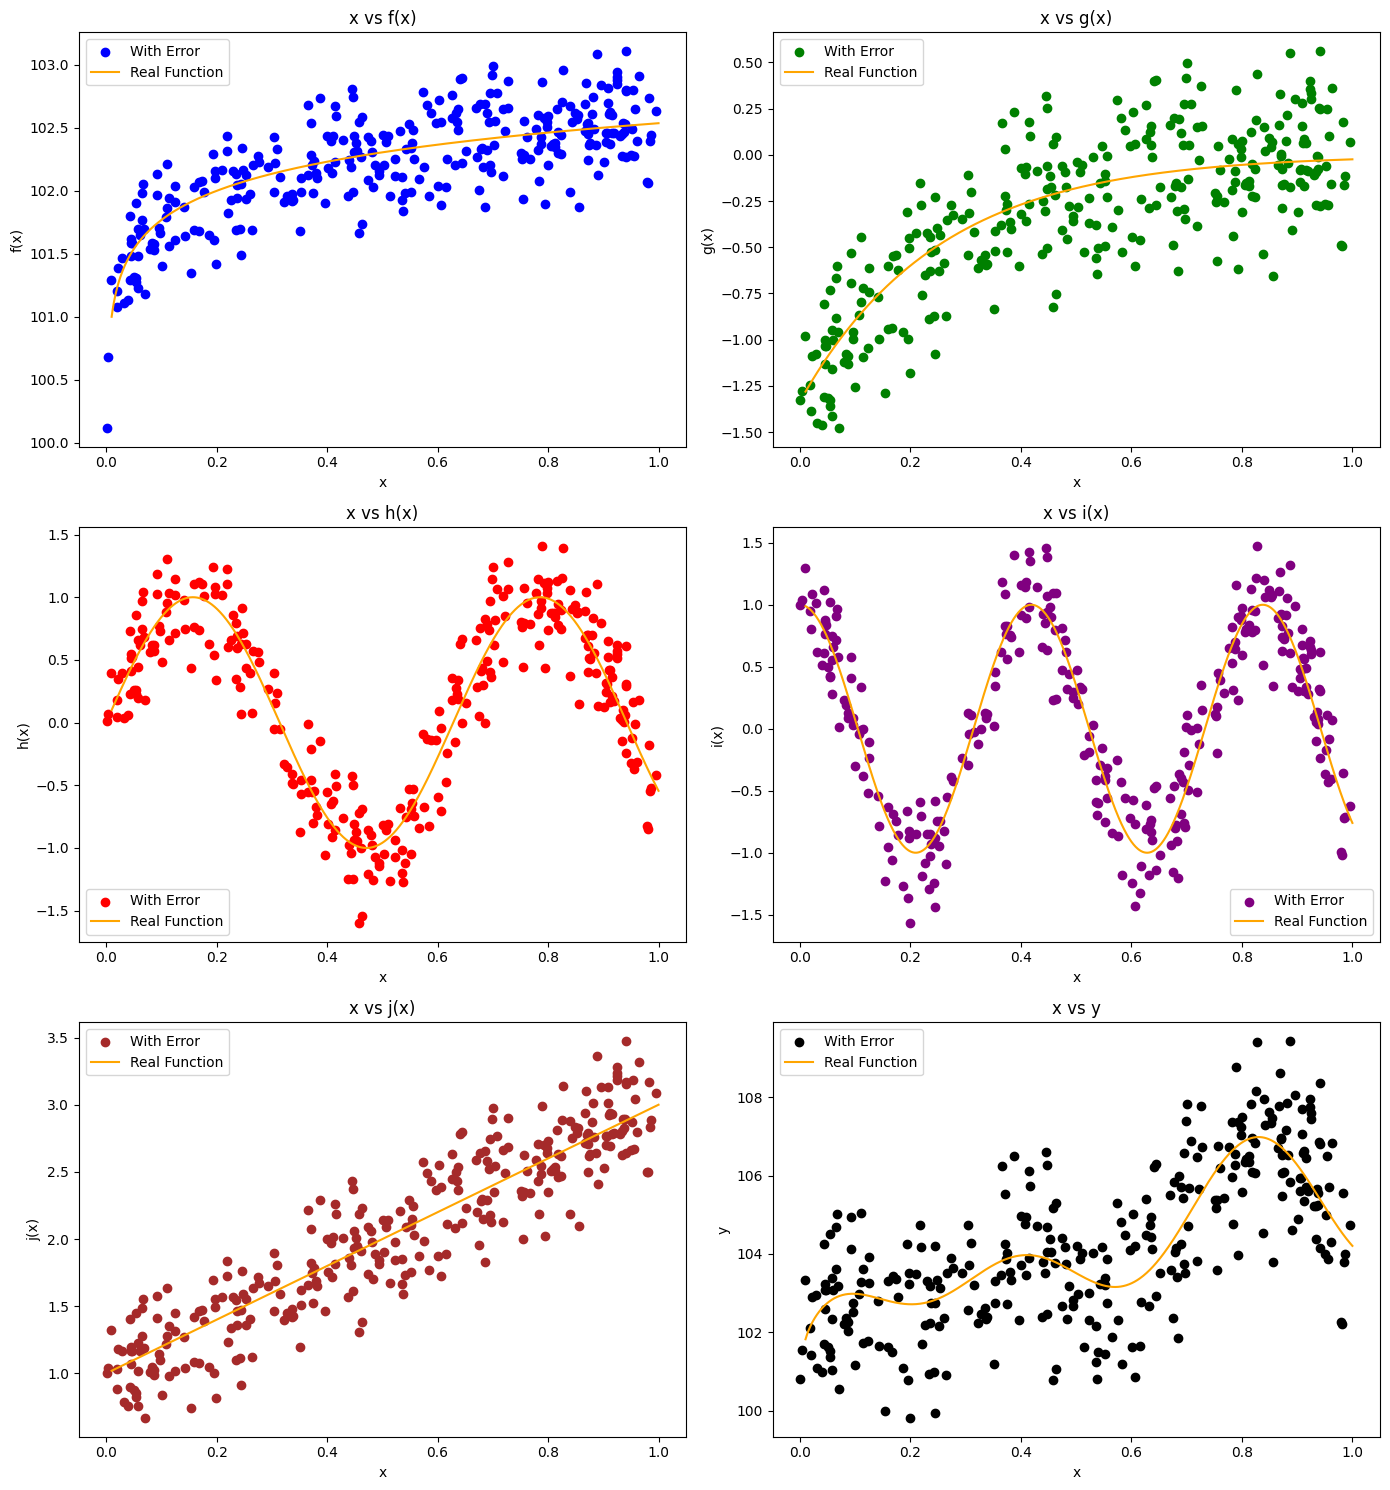

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the functions
def f(x0):
    return (1/3) * np.log(100 * x0) + 101

def g(x1):
    return (-4/3) * np.exp(-4 * np.abs(x1))

def h(x2):
    return np.sin(10 * x2)

def i(x2):
    return np.cos(15 * x2)

# Define the straight line function j(x)
def j(x):
    m = 2  # Slope of the line
    b = 1  # Y-intercept of the line
    return m * x + b

# Adjustable number of samples
n = 300  # You can change this value

# Generate uniform distributed values between [0, 1] for x
uniform_x_values = np.random.uniform(0, 1, n)

# Generate error term with standard deviation of 0.25
# Here y is sampled from a normal distribution with mean 0 and sd 1
error = np.random.normal(0, 0.25, n)

# Generate synthetic data with error term
uniform_data = {
    'x': uniform_x_values,
    'f(x)': f(uniform_x_values) + error,
    'g(x)': g(uniform_x_values) + error,
    'h(x)': h(uniform_x_values) + error,
    'i(x)': i(uniform_x_values) + error,
    'j(x)': j(uniform_x_values) + error,  # Add j(x) to the data
}

uniform_data['y'] = (
    uniform_data['f(x)'] +
    uniform_data['g(x)'] +
    uniform_data['h(x)'] +
    uniform_data['i(x)'] +
    uniform_data['j(x)']  # Include j(x) in y calculation
)

# Create DataFrame
uniform_df = pd.DataFrame(uniform_data)

# Generate line values for the real functions
x_line = np.linspace(0.01, 1, 1000)  # Fine grid for smooth lines

line_data = {
    'x': x_line,
    'f(x)': f(x_line),
    'g(x)': g(x_line),
    'h(x)': h(x_line),
    'i(x)': i(x_line),
    'j(x)': j(x_line),  # Real j(x) values
    'y': (
        f(x_line) +
        g(x_line) +
        h(x_line) +
        i(x_line) +
        j(x_line)  # Real y values including j(x)
    )
}

# Plotting the data
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Plot for f(x)
axs[0, 0].scatter(uniform_df['x'], uniform_df['f(x)'], color='blue', label='With Error')
axs[0, 0].plot(line_data['x'], line_data['f(x)'], color='orange', label='Real Function')
axs[0, 0].set_title('x vs f(x)')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].legend()

# Plot for g(x)
axs[0, 1].scatter(uniform_df['x'], uniform_df['g(x)'], color='green', label='With Error')
axs[0, 1].plot(line_data['x'], line_data['g(x)'], color='orange', label='Real Function')
axs[0, 1].set_title('x vs g(x)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('g(x)')
axs[0, 1].legend()

# Plot for h(x)
axs[1, 0].scatter(uniform_df['x'], uniform_df['h(x)'], color='red', label='With Error')
axs[1, 0].plot(line_data['x'], line_data['h(x)'], color='orange', label='Real Function')
axs[1, 0].set_title('x vs h(x)')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('h(x)')
axs[1, 0].legend()

# Plot for i(x)
axs[1, 1].scatter(uniform_df['x'], uniform_df['i(x)'], color='purple', label='With Error')
axs[1, 1].plot(line_data['x'], line_data['i(x)'], color='orange', label='Real Function')
axs[1, 1].set_title('x vs i(x)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('i(x)')
axs[1, 1].legend()

# Plot for j(x)
axs[2, 0].scatter(uniform_df['x'], uniform_df['j(x)'], color='brown', label='With Error')
axs[2, 0].plot(line_data['x'], line_data['j(x)'], color='orange', label='Real Function')
axs[2, 0].set_title('x vs j(x)')
axs[2, 0].set_xlabel('x')
axs[2, 0].set_ylabel('j(x)')
axs[2, 0].legend()

# Plot for y(x)
axs[2, 1].scatter(uniform_df['x'], uniform_df['y'], color='black', label='With Error')
axs[2, 1].plot(line_data['x'], line_data['y'], color='orange', label='Real Function')
axs[2, 1].set_title('x vs y')
axs[2, 1].set_xlabel('x')
axs[2, 1].set_ylabel('y')
axs[2, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Save Dataset

In [8]:
line_data_df = pd.DataFrame(line_data)
del line_data_df["x"]
line_data_df.to_csv('syn_data.csv', index=False)

In [9]:
line_data_df

,f(x),g(x),h(x),i(x),j(x),y
0,101.000000,-1.281053,0.099833,0.988771,1.020000,101.827552
1,101.031497,-1.275985,0.109689,0.986441,1.021982,101.873624
2,101.060273,-1.270937,0.119533,0.983892,1.023964,101.916726
3,101.086761,-1.265909,0.129366,0.981126,1.025946,101.957291
4,101.111298,-1.260901,0.139186,0.978143,1.027928,101.995655
...,...,...,...,...,...,...
995,102.533733,-0.024811,-0.510342,-0.719702,2.992072,104.270949
996,102.534064,-0.024713,-0.518839,-0.729943,2.994054,104.254623
997,102.534395,-0.024615,-0.527285,-0.740022,2.996036,104.238509
998,102.534726,-0.024518,-0.535679,-0.749938,2.998018,104.222609
